In [1]:
from q_learning import *
# from utils import *
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make('Acrobot-v1')

inp = Input(shape=(6,))
x = Dense(200, activation='relu')(inp)
x = Dense(200, activation='relu')(x)
# x = Dense(200, activation='relu')(x)
out = Dense(3, activation='linear')(x)
model = Model(inp, out)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001))


2023-06-19 16:31:04.892584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 16:31:05.437968: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zoid/miniconda3/envs/ai/lib/
2023-06-19 16:31:05.438028: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zoid/miniconda3/envs/ai/lib/
2023-06-19 16:31:05.438033: W tensorflow/compiler/tf2tenso

In [2]:

exp_replay = ExperienceReplay(max_memory=5000)
traget_net = TargetNetwork(model)
agent = QLearningAgent(model, traget_net, env, exp_replay, batch_size=1000, frequency=5, epsilon=0.05, max_time=500, gamma=0.9, step_size=0.5)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......input_layer
.........vars
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-06-19 16:31:07       184136
metadata.json                                  2023-06-19 16:31:07           64
config.json                                    2023-06-19 16:31:07         2497
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-06-19 16:31:06       184136
metadata.json                                  2023-06-19 16:31:06           64
config.json                                    2023-06-19 16:31:06

game_play :  88

game_play :  78

game_play :  73

game_play :  94

game_play :  84



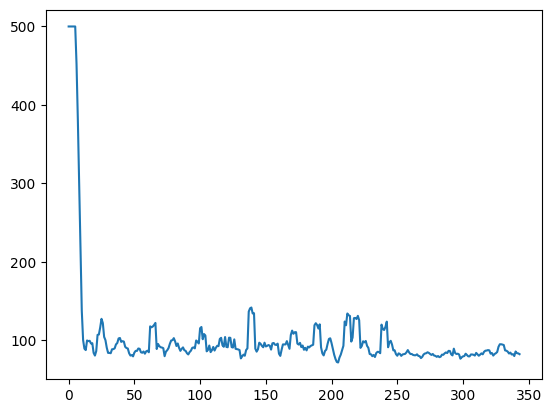

game_play :  87

game_play :  79

game_play :  96

game_play :  88

game_play :  90



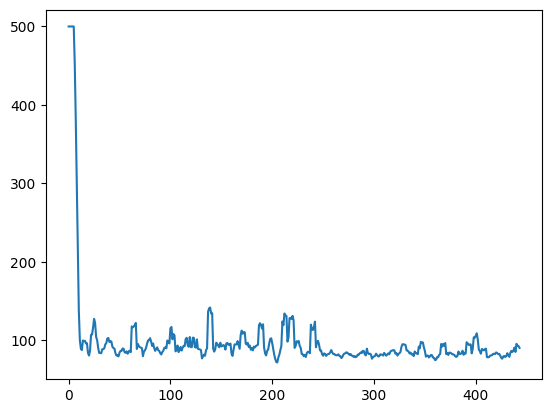

In [4]:
agent.epsilon = 0.0
agent.frequency = 10
for i in range(2):
    agent.train(100)
    avg_sum = []
    for i in range(len(agent.history)-5):
        avg_sum.append(np.mean(agent.history[i:i+5]))
    plt.plot(avg_sum)
    plt.show()

# agent.history = []

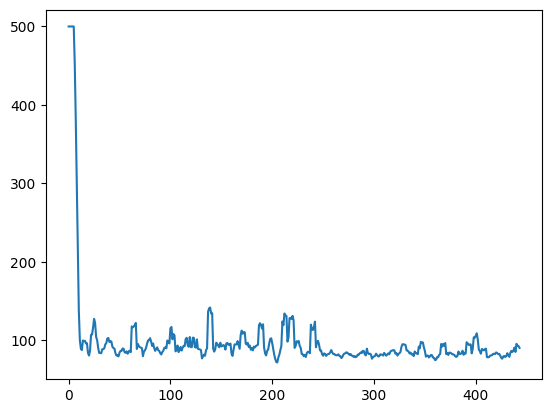

In [5]:
avg_sum = []
for i in range(len(agent.history)-5):
    avg_sum.append(np.mean(agent.history[i:i+5]))
plt.plot(avg_sum)
plt.show()

In [6]:
import pickle
with open('AcroBot.pkl', 'wb') as f:
    pickle.dump(model, f)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......input_layer
.........vars
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-06-19 16:33:03       526104
metadata.json                                  2023-06-19 16:33:03           64
config.json                                    2023-06-19 16:33:03         2497


In [ ]:
history = []
for game in range(100):
    state = env.reset()[0]
    done = False
    t = 0
    while (not done) and (t<500):
        q_vals = model(np.array([state]))[0]
        action = np.argmax(q_vals)
        state, reward, done, trunc, info = env.step(action)
        if done:
            break
        t += 1
    history.append(t)

plt.plot(history)
plt.show()

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-06-19 16:33:02       526104
metadata.json                                  2023-06-19 16:33:02           64
config.json                                    2023-06-19 16:33:02         2497
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......input_layer
.........vars
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


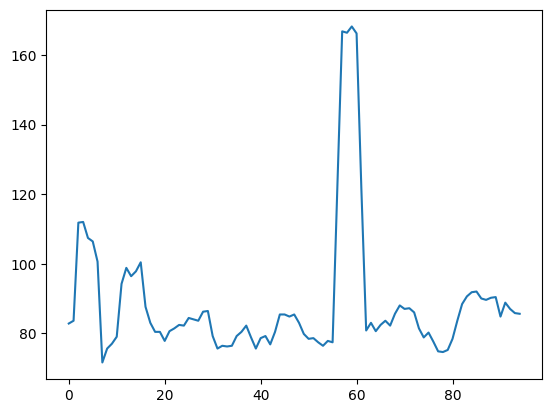

In [2]:
import cv2, pickle, gym
import numpy as np
import matplotlib.pyplot as plt
model2 = pickle.load(open('AcroBot.pkl', 'rb'))
history = []
env = gym.make('Acrobot-v1', render_mode='rgb_array')
for game in range(100):
    state = env.reset()[0]
    done = False
    t = 0
    while (not done) and (t<500):
        img = env.render()
        q_vals = model2(np.array([state]))[0]
        action = np.argmax(q_vals)
        state, reward, done, trunc, info = env.step(action)
        if done:
            break
        t += 1
        # cv2.imshow('img', img) 
        # cv2.waitKey(30) 
    history.append(t)


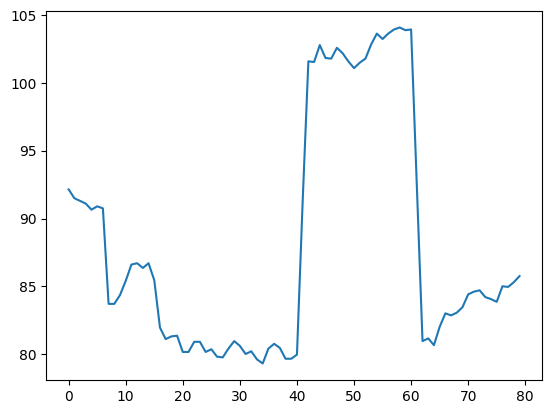

In [4]:
avg_sum = []
for i in range(len(history)-20):
    avg_sum.append(np.mean(history[i:i+20]))
plt.plot(avg_sum)
plt.show()